In [1]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy import constants

In [2]:
def gen_legendre(n):
    inner = Polynomial([-1,0,1])
    coef = ((2**n) * np.math.factorial(n)) 
    poly = inner**n
    return (coef**-1) * poly.deriv(n) #rodriguez formula

def gaussian(n):
    
    def func(x): #change function here
        f = x**3 / ((np.exp(x/(1-x))-1) * (1-x)**5)
        return  f
    
    P_n = gen_legendre(n) #generate legendre polynomial
    P_roots = P_n.roots() #roots of legendre polynomial
    
    dxdP = P_n.deriv()  #derivative of legendre polynomial
    weights = 2 / (1 - P_roots**2) * (1/dxdP(P_roots))**2 #calc weights
    
    return np.sum(weights*func(P_roots)) #
        
def gaussian_0_to_1(n):
    def func(x): #change function here
        f = x**3 / ((np.exp(x/(1-x))-1) * (1-x)**5) #converted integral so bounds are 0 to 1
        return  f
    
    P_n = gen_legendre(n) #generate legendre polynomial
    P_roots = P_n.roots() #roots of legendre polynomial
    #print(P_roots)
    dxdP = P_n.deriv()  #derivative of legendre polynomial
    weights = 2 / (1 - P_roots**2) * (1/dxdP(P_roots))**2 #calc weights
    
    new_weights = weights/2 #for new range 0 to 1 not -1 to 1
    new_roots = 0.5 * P_roots + 0.5
    return np.sum(new_weights*func(new_roots)) #integral on the new range

Part A picture and Part B work at the bottom of it:

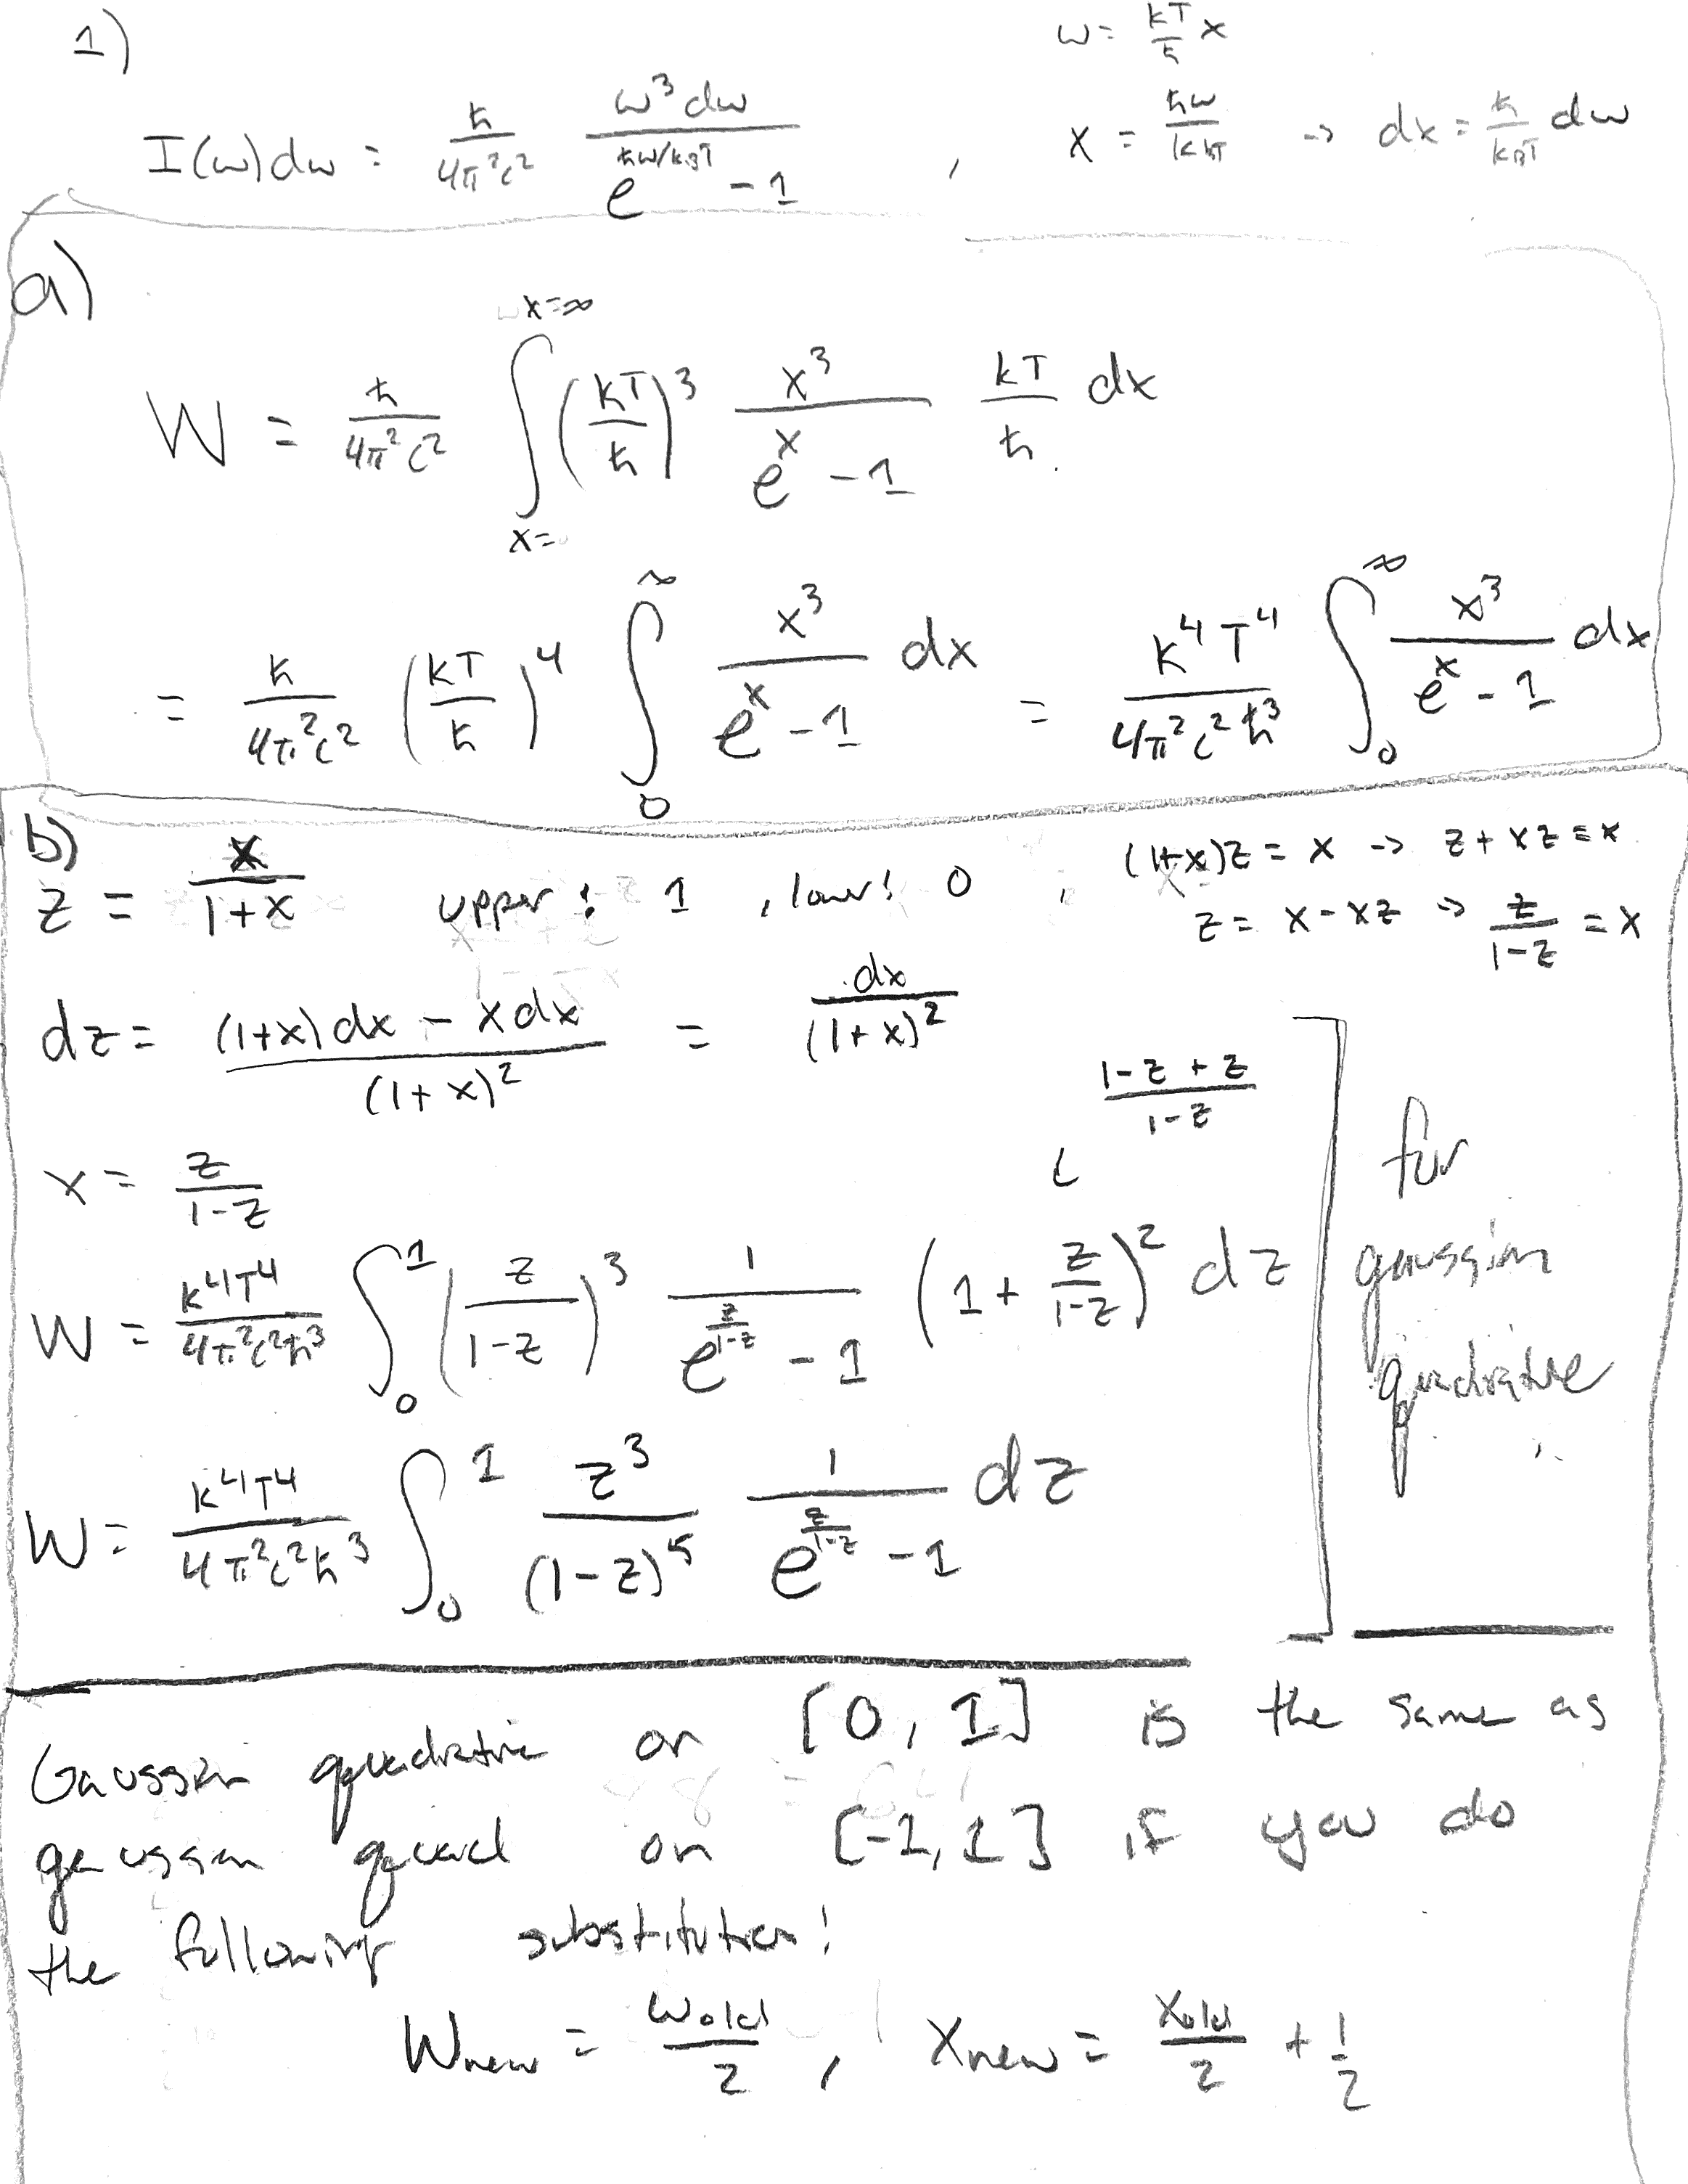

In [5]:
#PART B
integral = gaussian_0_to_1(30)
print(integral)
#For proof see this stack exchange thread
#https://math.stackexchange.com/questions/1544918/gaussian-quadrature-with-a-to-0-1-reference-domain-instead-of-a-1-1-ref
#used gaussian method with the substituion in the above thread

#analytical is pi^4/15 which is approx 6.4939394022
#so it got almost the 5th decimal place

6.493947742004806


In [33]:
#PART C
#
k = constants.k
hbar = constants.hbar
c = constants.c
stef_accepted = constants.Stefan_Boltzmann
integral = gaussian_0_to_1(30) #this is fine

stefan = integral * k**4/(4*np.pi**2 * c**2 * hbar**3)
print(stephan)
print(stef_accepted)

5.670381701272228e-08
5.670374419e-08
